## 讀取資料集

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [6]:
#iris.data
#iris.target

## 使用隨機森林做分類

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 100, criterion = 'entropy')

In [10]:
clf.fit(iris.data, iris.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
import numpy as np
def plot_estimator(estimator,X,y):
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
    Z=estimator.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.plot()
    plt.contourf(xx,yy,Z,alpha=0.4,cmap=plt.cm.RdYlBu)
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()

## 比較不同數量的樹所得到的分類結果

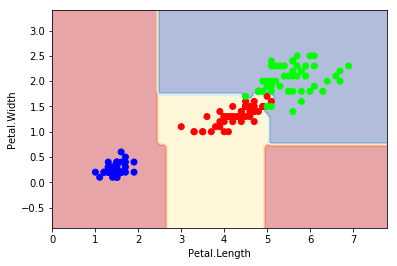

In [38]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
X=iris.data[:,[2,3]]
y=iris.target
clf=RandomForestClassifier(n_estimators=100,criterion="entropy")
clf.fit(X,y)
plot_estimator(clf,X,y)

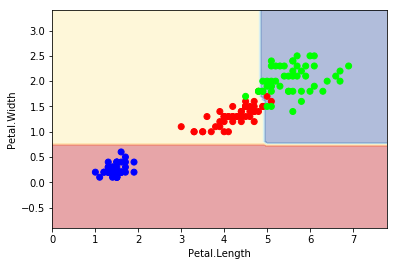

In [39]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
X=iris.data[:,[2,3]]
y=iris.target
clf=RandomForestClassifier(n_estimators=1,criterion="entropy")
clf.fit(X,y)
plot_estimator(clf,X,y)

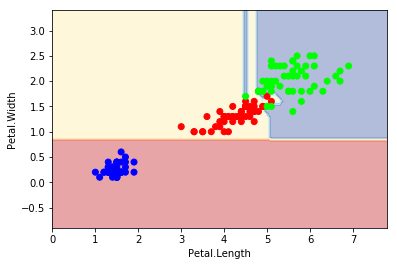

In [40]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
X=iris.data[:,[2,3]]
y=iris.target
clf=RandomForestClassifier(n_estimators=10,criterion="entropy")
clf.fit(X,y)
plot_estimator(clf,X,y)

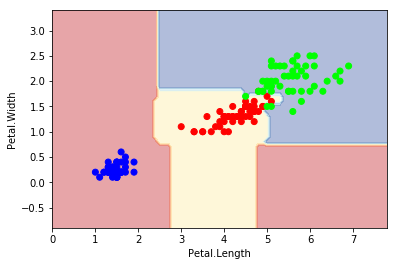

In [41]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
X=iris.data[:,[2,3]]
y=iris.target
clf=RandomForestClassifier(n_estimators=100,criterion="entropy")
clf.fit(X,y)
plot_estimator(clf,X,y)

## 比較不同演算法

In [42]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
clf1=SVC(kernel="rbf")
clf1.fit(X,y)

clf2=DecisionTreeClassifier()
clf2.fit(X,y)

clf3=RandomForestClassifier(n_estimators=10,criterion="entropy")
clf3.fit(X,y)

clf4=LogisticRegression()
clf4.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

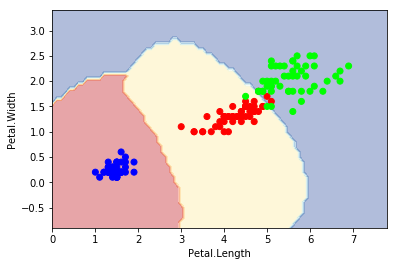

In [43]:
plot_estimator(clf1,X,y)

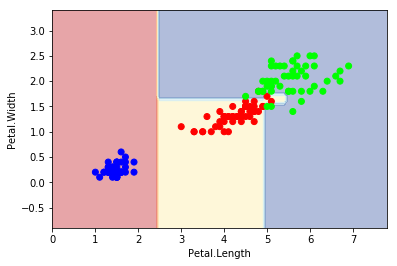

In [44]:
plot_estimator(clf2,X,y)

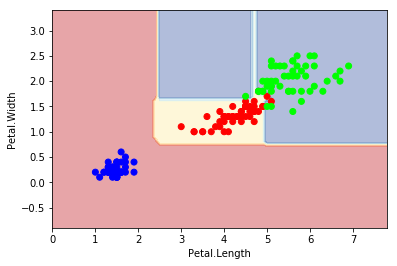

In [45]:
plot_estimator(clf3,X,y)

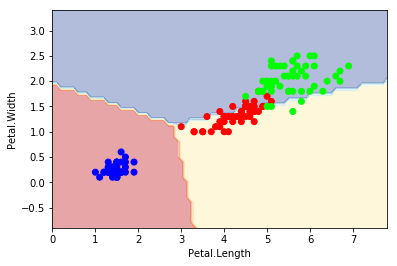

In [46]:
plot_estimator(clf4,X,y)

## 評估模型

In [47]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(iris.data, iris.target)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
predicted = clf.predict(iris.data)

In [53]:
sum(predicted == iris.target) / len(iris.target)

0.95999999999999996

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted, iris.target)

0.95999999999999996

In [60]:
from sklearn.datasets import load_iris
iris = load_iris()

In [64]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
X=iris.data[:,[2,3]]
y=iris.target

clf1=SVC(kernel="rbf")
clf1.fit(X,y)

clf2=DecisionTreeClassifier()
clf2.fit(X,y)

clf3=RandomForestClassifier(n_estimators=10,criterion="entropy")
clf3.fit(X,y)

clf4=LogisticRegression()
clf4.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
#svm
accuracy_score(clf1.predict(X), y)

0.96666666666666667

In [67]:
#Decision Tree
accuracy_score(clf2.predict(X), y)

0.99333333333333329

In [68]:
#Random Forest
accuracy_score(clf3.predict(X), y)

0.99333333333333329

In [69]:
#Logistic Regression
accuracy_score(clf4.predict(X), y)

0.87333333333333329

## Confusion Matrix

In [75]:


from sklearn.metrics import confusion_matrix

predicted = clf1.predict(X)
m = confusion_matrix(y, clf1.predict(X))
m

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

In [84]:
from sklearn.metrics import confusion_matrix

predicted = clf2.predict(X)
m = confusion_matrix(y, clf2.predict(X))
from sklearn import tree
tree.export_graphviz(clf2,out_file='tree.dot')

In [77]:
from sklearn.metrics import confusion_matrix

predicted = clf3.predict(X)
m = confusion_matrix(y, clf3.predict(X))
m

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]], dtype=int64)

In [78]:
from sklearn.metrics import confusion_matrix

predicted = clf4.predict(X)
m = confusion_matrix(y, clf4.predict(X))
m

array([[50,  0,  0],
       [ 0, 35, 15],
       [ 0,  4, 46]], dtype=int64)

## 將混淆矩陣視覺化

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


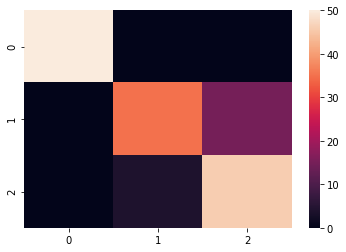

In [79]:
%pylab inline
import seaborn
seaborn.heatmap(m)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y,predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.90      0.70      0.79        50
          2       0.75      0.92      0.83        50

avg / total       0.88      0.87      0.87       150



## hold-out 驗證

In [85]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris=load_iris()
X=iris.data
y=iris.target

In [87]:
X.shape

(150, 4)

In [88]:
y.shape

(150,)

In [89]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.33,random_state=123)


In [90]:
train_X.shape

(100, 4)

In [91]:
test_X.shape

(50, 4)

In [92]:
train_y.shape

(100,)

In [93]:
test_y.shape

(50,)

In [94]:
clf=DecisionTreeClassifier()
clf.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
from sklearn.metrics import accuracy_score
predicted=clf.predict(test_X)

accuracy_score(test_y,predicted)

0.95999999999999996

In [97]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(test_y,predicted)
m

array([[20,  0,  0],
       [ 0, 11,  0],
       [ 0,  2, 17]], dtype=int64)

In [99]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)
acc = [] 
for train,test in kf.split(X):
    train_X,test_X,train_y,test_y=X[train],X[test],y[train],y[test]
    clf=DecisionTreeClassifier()
    clf.fit(train_X,train_y)
    predicted=clf.predict(test_X)
    #print(accuracy_score(test_y,predicted))
    acc.append(accuracy_score(test_y,predicted))

In [104]:
sum(acc) / len(acc)
std(acc)

0.084327404271156786

In [105]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(clf,X=iris.data,y=iris.target,cv=10)
acc


array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.86666667,  0.93333333,  1.        ,  1.        ,  1.        ])

In [106]:
acc.mean()

0.95999999999999996

In [107]:
acc.std()

0.044221663871405324

In [112]:
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()


In [115]:
res=[]

for train,test in loo.split(X):
    train_X,test_X,train_y,test_y=X[train],X[test],y[train],y[test]
    clf=DecisionTreeClassifier()
    clf.fit(train_X,train_y)
    predicted=clf.predict(test_X)
    res.extend((predicted==test_y).tolist())
sum(res) / 150

0.93999999999999995

## 建立 ROC Curve

In [120]:
clf=DecisionTreeClassifier(max_depth=2)
clf.fit(iris.data, iris.target)
predicted = clf.predict_proba(iris.data)
predicted[0:10]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [121]:
predicted = clf.predict(iris.data)
m = confusion_matrix(iris.target, predicted)
m

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

In [122]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
iris=load_iris()
X=iris.data[50:150,]

In [124]:
iris.target[50:150]

le=preprocessing.LabelEncoder()
y=le.fit_transform(iris.target[50:150])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [129]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X,y)
predicted = clf.predict(X)
confusion_matrix(y, predicted)

array([[47,  3],
       [ 1, 49]], dtype=int64)

In [130]:
proba_ = clf.predict_proba(X)

In [156]:
import numpy as np
threshold = 0.5
predicted = proba_[:,0] > threshold
res = predicted.tolist()
res_list = []
for ele in res:
    if ele ==True:
        res_list.append(0)
    else:
        res_list.append(1)
res_ary = np.array(res_list)
m = confusion_matrix(y, res_ary)
TP = m[0,0]
FP = m[0,1]
FN = m[1,0]
TN = m[1,1]
TPR =  TP / (TP + FN) 
FPR =  FP / (FP + TN)
TPR, FPR

(0.97916666666666663, 0.057692307692307696)

In [181]:
import numpy as np

TPR_ary = [0]
FPR_ary = [0]
for threshold in np.arange(0.0, 1.0, 0.01):
    predicted = proba_[:,0] >= threshold
    res = predicted.tolist()
    res_list = []
    for ele in res:
        if ele ==True:
            res_list.append(0)
        else:
            res_list.append(1)
    res_ary = np.array(res_list)
    m = confusion_matrix(y, res_ary)
    TP = m[0,0]
    FP = m[0,1]
    FN = m[1,0]
    TN = m[1,1]
    TPR =  TP / (TP + FN) 
    FPR =  FP / (FP + TN)
    if (not np.isnan(TPR)) and (not np.isnan(FPR)):        
        TPR_ary.append(TPR)
        FPR_ary.append(FPR)
TPR_ary.append(1)
FPR_ary.append(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in longlong_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in longlong_scalars


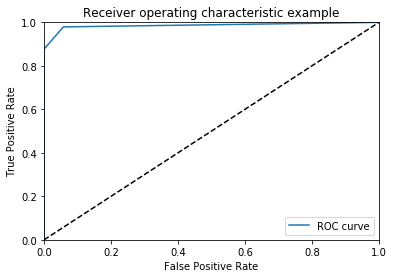

In [184]:
import matplotlib.pyplot as plt
plt.plot(FPR_ary, TPR_ary,label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 建立 ROC Curve （使用sklearn）

In [185]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
iris=load_iris()
X=iris.data[50:150,]
le=preprocessing.LabelEncoder()
y=le.fit_transform(iris.target[50:150])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [186]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.33,random_state=123)
clf=DecisionTreeClassifier()
clf.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [187]:
probas_=clf.fit(train_X,train_y).predict_proba(test_X)
probas_[:,1]


array([ 0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  1.,  0.,  0.,  1.,  1.])

In [188]:
from sklearn.metrics import roc_curve 
fpr,tpr,thresholds=roc_curve(test_y,probas_[:,1])

In [190]:
fpr, tpr, thresholds

(array([ 0.        ,  0.05882353,  1.        ]),
 array([ 0.    ,  0.8125,  1.    ]),
 array([ 2.,  1.,  0.]))

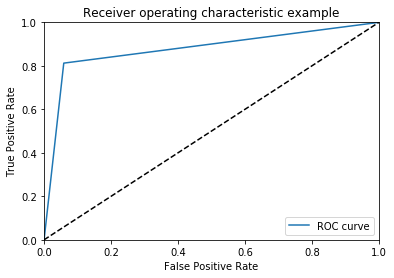

In [191]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr,label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [192]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the ROC curve : %f"%roc_auc)

Area under the ROC curve : 0.876838


## 使用ROC Curve 比較不同模型

In [196]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
clf1=DecisionTreeClassifier()
clf1.fit(train_X,train_y)

clf2=SVC(probability=True)
clf2.fit(train_X,train_y)

clf3=LogisticRegression()
clf3.fit(train_X,train_y)

clf4=RandomForestClassifier()
clf4.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

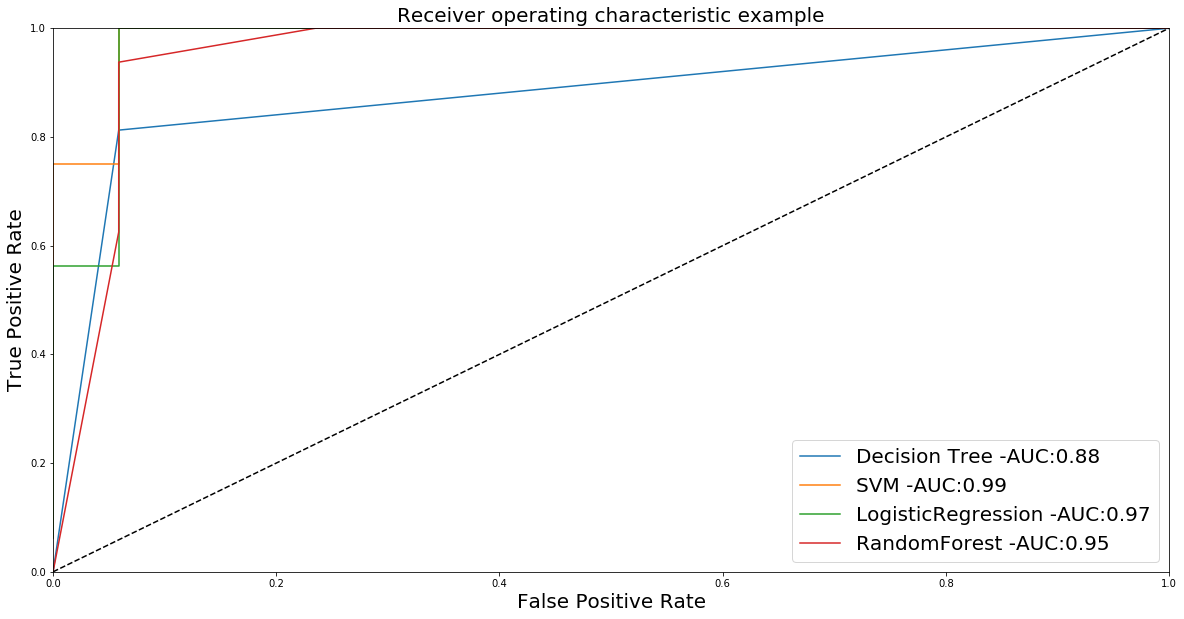

In [198]:
plt.figure(figsize=[20,10])
for clf,title in zip([clf1,clf2,clf3,clf4],['Decision Tree','SVM','LogisticRegression','RandomForest']):
    probas_=clf.fit(train_X,train_y).predict_proba(test_X)
    fpr,tpr,thresholds=roc_curve(test_y,probas_[:,1])
    plt.plot(fpr,tpr,label='%s -AUC:%.2f'%(title,auc(fpr,tpr)))
    
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver operating characteristic example',fontsize=20)
plt.legend(loc="lower right",fontsize=20)
plt.show()

## 預測客戶是否採取定期存款

### 資料前處理

In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/pyfintech/master/data/bank-additional-full.csv', sep=';')

In [2]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
df['y'].head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [5]:
df['y'].replace('no',  0, inplace = True)
df['y'].replace('yes', 1, inplace = True)

In [6]:
cat_var = ['job','marital','education',
              'default','housing','loan',
              'contact','month','day_of_week',
              'poutcome',]
num_var = ['age','duration','campaign','pdays','previous','emp.var.rate',
           'cons.price.idx','cons.conf.idx','euribor3m','nr.employed',]

In [7]:
import pandas
pandas.get_dummies(df['marital']).head()

,divorced,married,single,unknown
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [8]:
import pandas as pd
bank_df = df['y']

for var in cat_var:
    bank_df = pd.concat([bank_df,pd.get_dummies(df[var])],axis=1)

bank_df = pd.concat([bank_df,df[num_var]],axis=1)

In [9]:
bank_df.head()

,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,0,0,1,0,0,0,0,0,...,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,0,0,0,0,0,0,0,0,1,0,...,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,0,0,0,0,0,0,0,0,1,0,...,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,0,1,0,0,0,0,0,0,0,0,...,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,0,0,0,0,0,0,0,0,1,0,...,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


### 分為訓練與測試資料集

In [10]:
from sklearn.model_selection import train_test_split
data   = bank_df.drop('y', axis = 1)
target = bank_df['y']

In [11]:
data.shape

(41188, 63)

In [12]:
target.shape

(41188,)

In [13]:
train_X, test_X, train_y, test_y = train_test_split(data, target, test_size = 0.33,random_state=123)

In [14]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((27595, 63), (27595,), (13593, 63), (13593,))

### 建立模型

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### 交叉驗證

In [16]:
from sklearn.cross_validation import cross_val_score
cross_val_score(clf, train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([ 0.89455376,  0.88888889,  0.89095456])

In [17]:
cross_val_score(clf, test_X, test_y)

array([ 0.88570168,  0.88832487,  0.88498896])

In [19]:
from sklearn.metrics import classification_report
predicted = clf.predict(test_X)
print(classification_report(test_y, predicted))

             precision    recall  f1-score   support

          0       0.94      0.93      0.94     12059
          1       0.51      0.55      0.53      1534

avg / total       0.89      0.89      0.89     13593



In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[11250,   809],
       [  691,   843]], dtype=int64)

### 繪製 ROC Curve

In [21]:
from sklearn.metrics import roc_curve ,auc
probas_=clf.fit(train_X,train_y).predict_proba(test_X)
fpr,tpr,thresholds=roc_curve(test_y,probas_[:,1])

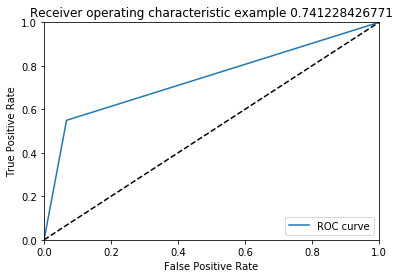

In [22]:
import matplotlib.pyplot as plt

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example %s'%(roc_auc))
plt.legend(loc="lower right")
plt.show()

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
clf1=DecisionTreeClassifier()
clf1.fit(train_X,train_y)

#clf2=SVC(probability=True)
#clf2.fit(train_X,train_y)

clf3=LogisticRegression()
clf3.fit(train_X,train_y)

clf4=RandomForestClassifier()
clf4.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

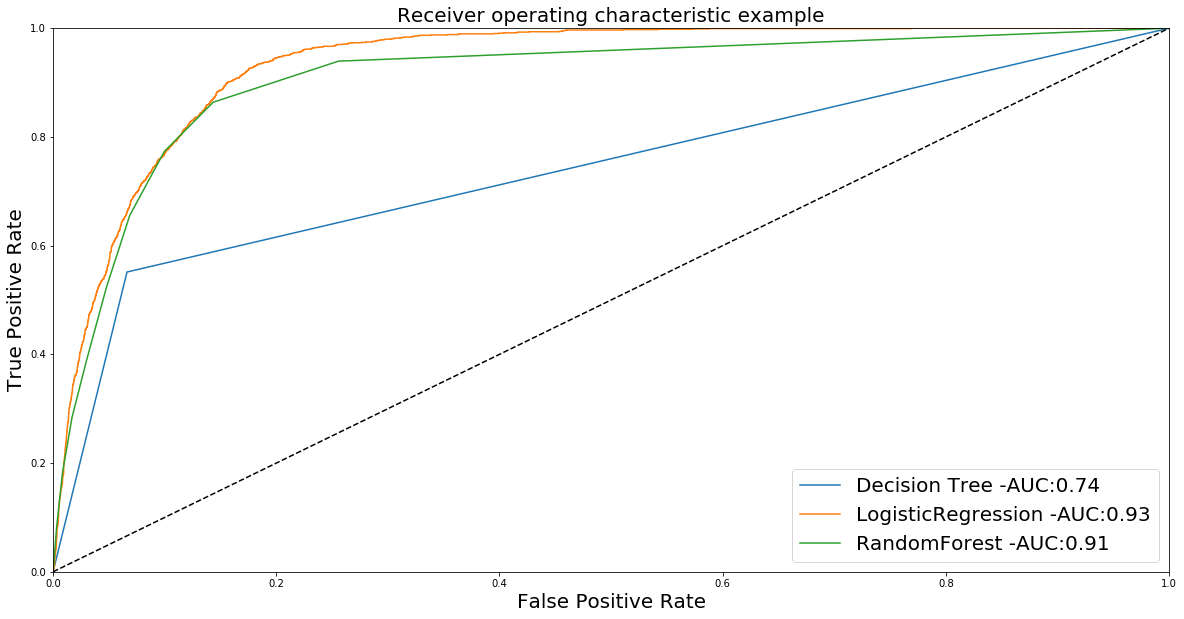

In [24]:
plt.figure(figsize=[20,10])
for clf,title in zip([clf1,clf3,clf4],['Decision Tree','LogisticRegression','RandomForest']):
    probas_=clf.fit(train_X,train_y).predict_proba(test_X)
    fpr,tpr,thresholds=roc_curve(test_y,probas_[:,1])
    plt.plot(fpr,tpr,label='%s -AUC:%.2f'%(title,auc(fpr,tpr)))
    
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver operating characteristic example',fontsize=20)
plt.legend(loc="lower right",fontsize=20)
plt.show()

In [27]:
for ele in zip(clf4.feature_importances_,bank_df.drop('y', axis = 1).keys()):
    print(ele)

(0.011800058130870861, 'admin.')
(0.0090183240858284792, 'blue-collar')
(0.0033346477087605767, 'entrepreneur')
(0.0032260380127366274, 'housemaid')
(0.0064806996059424814, 'management')
(0.0061165794630175336, 'retired')
(0.0042354272533990803, 'self-employed')
(0.0059356248898850454, 'services')
(0.004546953472932015, 'student')
(0.010663492722691823, 'technician')
(0.0037881936603974377, 'unemployed')
(0.0013863419355838538, 'unknown')
(0.007040894562303006, 'divorced')
(0.010878346606822388, 'married')
(0.011628012843498497, 'single')
(0.00045589478772231439, 'unknown')
(0.0053678130989226747, 'basic.4y')
(0.0042583368685257268, 'basic.6y')
(0.0086527360802805819, 'basic.9y')
(0.011720496426609585, 'high.school')
(0.00021085142377110297, 'illiterate')
(0.0097725731150935559, 'professional.course')
(0.013282785149025264, 'university.degree')
(0.0048844560630308164, 'unknown')
(0.0053806391132003323, 'no')
(0.0052751135013718916, 'unknown')
(0.0, 'yes')
(0.013215682607801307, 'no')
(